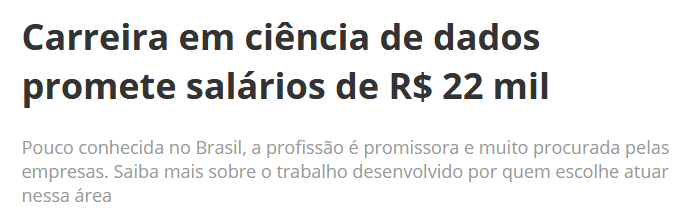

A pergunta que virou meme na comunidade dos cientistas de dados finalmente poderá ser respondida. Afinal, um cientista de dados no Brasil ganha R$ 22mil por mês?

Para responder esta tão cobiçada pergunta, seguiremos a seguinte ordem:

**01)** Importação das Bibliotecas e do Dataset

**02)** Análise Superficial do Dataset

**03)** Manipulação do Dataset

**04)** Visualização dos Dados

Criado por [Leonardo Fuchs](https://kaggle.com/LeoFuchs)

## **01)** Importação das Bibliotecas e do Dataset


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv('/kaggle/input/pesquisa-data-hackers-2019/datahackers-survey-2019-anonymous-responses.csv')
data.head(5)

## **02)** Análise Superficial do Dataset

Vamos realizar uma análise superficial dos dados, apenas para se ter um embasamento de como o dataset está organizado, quais colunas podem ser relevantes ao se responder a pergunta indagada e se certos *warnings* podem afetar a análise.

In [ ]:
profile = ProfileReport(data, correlations={"cramers": {"calculate": False}})

profile

## **03)** Manipulação do Dataset


Vamos remover algumas linhas do dataset que não se adequam a análise dos salários de cientistas de dados:


1. Vamos eliminar as linhas que não possuem uma especificação de salário na coluna `('P16', 'salary_range')`
2. As linhas em que a pessoa não está empregada via CLT na coluna `('P10', 'job_situation')`
3. As linhas em que a pessoa não se considera atuante em data science na coluna `('P19', 'is_data_science_professional')`
4. E as linhas onde a pessoa atualmente não reside no Brasil na coluna `('P3', 'living_in_brasil')`.

In [ ]:
data["('P16',_'salary_range')"].isna().sum(), (data["('P10',_'job_situation')"] != 'Empregado (CTL)').sum(), (data["('P19',_'is_data_science_professional')"] == 0).sum(), (data["('P3',_'living_in_brasil')"] == 0).sum()

In [ ]:
data = data[data["('P16',_'salary_range')"].notna()]
data.shape

In [ ]:
data = data[data["('P10',_'job_situation')"] == 'Empregado (CTL)']
data.shape

In [ ]:
data = data[data["('P19',_'is_data_science_professional')"] == 1]
data.shape

In [ ]:
data = data[data["('P3',_'living_in_brasil')"] == 1]
data.shape

Das 1527 linhas iniciais do dataset, nos restaram apenas 552 linhas para realizar a análise do salário médio dos cientistas de dados no Brasil.

In [ ]:
data['salary'] = data["('P16',_'salary_range')"].map({'Menos de R$ 1.000/mês': 'Menos de R$ 1.000/mês', 
                                                        'de R$ 1.001/mês a R$ 2.000/mês': 'de R$ 1.001 à 2.000/mês', 
                                                        'de R$ 2.001/mês a R$ 3000/mês': 'de R$ 2.001 à 3.000/mês', 
                                                        'de R$ 3.001/mês a R$ 4.000/mês': 'de R$ 3.001 à 4.000/mês', 
                                                        'de R$ 4.001/mês a R$ 6.000/mês': 'de R$ 4.001 à 6.000/mês', 
                                                        'de R$ 6.001/mês a R$ 8.000/mês': 'de R$ 6.001 à 8.000/mês',
                                                        'de R$ 8.001/mês a R$ 12.000/mês': 'de R$ 8.001 à 12.000/mês',
                                                        'de R$ 12.001/mês a R$ 16.000/mês': 'de R$ 12.001 à 16.000/mês',
                                                        'de R$ 16.001/mês a R$ 20.000/mês': 'de R$ 16.001 à 20.000/mês',
                                                        'de R$ 20.001/mês a R$ 25.000/mês': 'de R$ 20.001 à 25.000/mês',
                                                        'Acima de R$ 25.001/mês': 'Acima de R$ 25.001/mês'})

## **04)** Visualização dos Dados

Vamos agora visualizar os dados manipulados, buscando entender se realmente os cientistas de dados ganham algo próximo a 22 mil reais por mês, e quantos % dos cientistas de dados conseguiram chegar a este salário.

In [ ]:
import matplotlib.ticker as ticker

salary_order = ['Menos de R$ 1.000/mês', 'de R$ 1.001 à 2.000/mês', 'de R$ 2.001 à 3.000/mês', 'de R$ 3.001 à 4.000/mês',
                'de R$ 4.001 à 6.000/mês', 'de R$ 6.001 à 8.000/mês', 'de R$ 8.001 à 12.000/mês',
                'de R$ 12.001 à 16.000/mês', 'de R$ 16.001 à 20.000/mês', 'de R$ 20.001 à 25.000/mês',
                'Acima de R$ 25.001/mês']

ncount = len(data)

plt.figure(figsize=(15,10))
ax = sns.countplot(x="salary", data=data, order=salary_order)
plt.title('Salário dos Cientistas de Dados', size=14)
plt.xlabel('Variação dos Salários', size=12)

ax2 = ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel("Número de Entrevistados", size=12, labelpad=12)
ax2.set_ylabel('Frequência [%]', size=12)

ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha='center', va='bottom')

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax2.set_ylim(0, 100)
ax.set_ylim(0, 200)

ax2.grid(None)

Com isso, podemos tirar algumas conclusões finais:

1. Fica claro que a realidade salarial dos cientistas de dados no Brasil não está nem próxima de 22 mil reais, girando na casa dos 3 à 12 mil reais por mês (~78% dos entrevistados ganham dentro desta faixa salarial).
2. Apenas 1.1% dos entrevistados recebem algo próximo à 22 mil reais, enquanto apenas 0.4% recebem mais do que 25 mil reais, enfatizando o quanto o salário médio de um cientista de dados não está nem perto do divulgado.